<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/Kaggle_Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data from kaggle

1. Go to “Account”, go down the page, and find the “API” section.Click the “Create New API Token” button.The “kaggle.json” file will be downloaded.

2 . Upload it in the current directory


In [5]:
# 3.Install Kaggle API.
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# 4.Run the following code to configure the path to “kaggle.json”
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [11]:
# 5.In kaggle website, Click the “Data” section and copy the following line of link
# and Paste the code in the Colab notebook and run wit "!"

!kaggle competitions download -c dogs-vs-cats


 99% 805M/812M [00:07<00:00, 144MB/s]
100% 812M/812M [00:07<00:00, 118MB/s]


In [12]:
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [13]:
import zipfile
with zipfile.ZipFile('/content/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [14]:
import zipfile
with zipfile.ZipFile('/content/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [41]:
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage import io  # to read an image

In [21]:
# how to classify train data

filenames = os.listdir('/content/train')
print(filenames[0])
print(filenames[0].split('.'))
print(filenames[0].split('.')[0])

cat.3463.jpg
['cat', '3463', 'jpg']
cat


In [57]:
class ClassifyData(Dataset):

  def __init__(self,root_dir,mode=None):
    self.root_dir = root_dir
    self.file_list = os.listdir(root_dir)
    self.mode = mode

  def __len__(self):
    return len(self.file_list)
  
  def __getitem__(self,index):
    image_name = self.file_list[index]
    image_path = os.path.join(self.root_dir,image_name) 
    image =  torchvision.io.read_image(image_path) 
    # ATTENTION : It is interesting to note that the shape of the image (with torchvision.io.read_image ) is
    # [3, H, W] whereas in most image formats on Python (with skimage.io.imread) we would have had a shape [H, W, 3]

    #getting lables
    if self.mode == 'train':
      if self.file_list[index].split('.')[0] == 'cat' :
        y_label = torch.tensor(0.)
      else :
        y_label = torch.tensor(1.)

      return (image,y_label)
    
    else :
      return image
    


In [58]:
dataset = ClassifyData('/content/train',mode='train')

In [63]:
a,b = next(iter(dataset))
print(a.type(),a.shape,b)

torch.ByteTensor torch.Size([3, 375, 499]) tensor(0.)


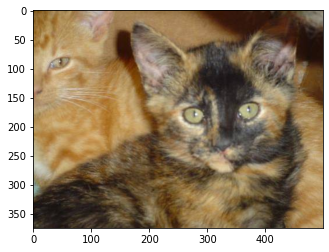

In [61]:
plt.imshow(a.permute((1,2,0))); # because our image is based on pytorch [3, H, W]